In [1]:
# !pip install torch
# !pip install fair-esm==2.0.0
# !pip install biopython>=1.78
# !pip install matplotlib>=3.10
# !pip install numpy>=1.26.4
# !pip install networkx>=3.4.2
# !pip install scipy>=1.15.2

## Setup Package, PLM and Reference Sequence

In [2]:
from fmd_evolution import *
import esm # to use the PLM ESM-2
import os # to process evaluation data from MSA file
import numpy # for evaluation of paths

In [3]:
# Source: https://github.com/facebookresearch/esm/tree/main?tab=readme-ov-file#esmfold
model, alphabet = esm.pretrained.load_model_and_alphabet("esm2_t33_650M_UR50D") 
batch_converter = alphabet.get_batch_converter()

In [4]:
modelSingleton = ModelSingleton(model=model,alphabet=alphabet,batch_converter=batch_converter)

In [5]:
reference_seq = 'TTSAGESADPVTATVENYGGETQVQRRQHTDIAFILDRFVKVKPKEQVNVLDLMQIPAHTLVGALLRTATYYFSDLELAVKHEGDLTWVPNGAPETALDNTTNPTAYHKEPLTRLALPYTAPHRVLATVYNGSSKYGDTSTNNVRGDLQVLAQKAERTLPTSFNFGAIKATRVTELLYRMKRAETYCPRPLLAIQPSDARHKQRIVAPAKQ'

In [6]:
# mutation strategy parameters
constrained_start = 138 # start of high variability region
constrained_end = 143 # end of high variability region
mh_iterations = 10 # for metropolis-hastings algorithm
top_k_percent = 0.02 # % of pool of 114 possible mutations

# evaluation strategy parameters
max_generations = 7

In [7]:
# reference seq parameters
segment = list(reference_seq)[constrained_start-1:constrained_end] # constrained segment to mutate
ref_seq_id = ''.join(segment)
ref_seq_id = "base"

In [8]:
for pos in range(constrained_start,constrained_end+1):
    print(f"Position {pos} : Amino Acid {segment[pos-constrained_start]}")

Position 138 : Amino Acid D
Position 139 : Amino Acid T
Position 140 : Amino Acid S
Position 141 : Amino Acid T
Position 142 : Amino Acid N
Position 143 : Amino Acid N


In [9]:
plm = ProteinLanguageModel()
fmd_sequence = plm.create_protein_sequence(id=ref_seq_id,sequence=reference_seq) # protein sequence object generator

## Evolve VP1 Reference Sequence Across 6 Highly Mutable Positions

In [10]:
mutation_strat = MetropolisHastings(iterations=mh_iterations, top_k_percent=top_k_percent, start_pos=constrained_start,end_pos=constrained_end) # to generate pool of mutations
eval_strat = EvaluationStrategy(root_sequence = fmd_sequence) # to score and to filter pool of mutations
evolution = Evolution(
    root_sequence = fmd_sequence,
    mutation_strategy = mutation_strat,
    evaluation_strategy = eval_strat,
    max_generations=max_generations)

In [11]:
evolution.evolve_sequence() 

Number of possible_mutations = 114
K mutations (pool size) = 2
Pool of potential mutations: [('S', 140, 'K'), ('N', 142, 'T')]
Parent: mutation:base, probability:0.80945, distance 0
Mutation accepted: S140K, probability: 0.81218, distance: 0.00056
Mutation accepted: N142T, probability: 0.81179, distance: 0.00054
Viable mutations: ['S140K', 'N142T']
Number of possible_mutations = 114
K mutations (pool size) = 2
Pool of potential mutations: [('T', 141, 'V'), ('D', 138, 'T')]
Parent: mutation:S140K, probability:0.81218, distance 0.00056
Mutation accepted: T141V, probability: 0.81265, distance: 0.00078
Mutation accepted: D138T, probability: 0.81041, distance: 0.00064
Viable mutations: ['T141V', 'D138T']
Number of possible_mutations = 114
K mutations (pool size) = 2
Pool of potential mutations: [('T', 139, 'P'), ('N', 142, 'E')]
Parent: mutation:T141V, probability:0.81265, distance 0.00078
Mutation accepted: T139P, probability: 0.81125, distance: 0.00105
Viable mutations: ['T139P']
Number o

## Visualise Evolutionary Paths Generated for the VP1 Protein

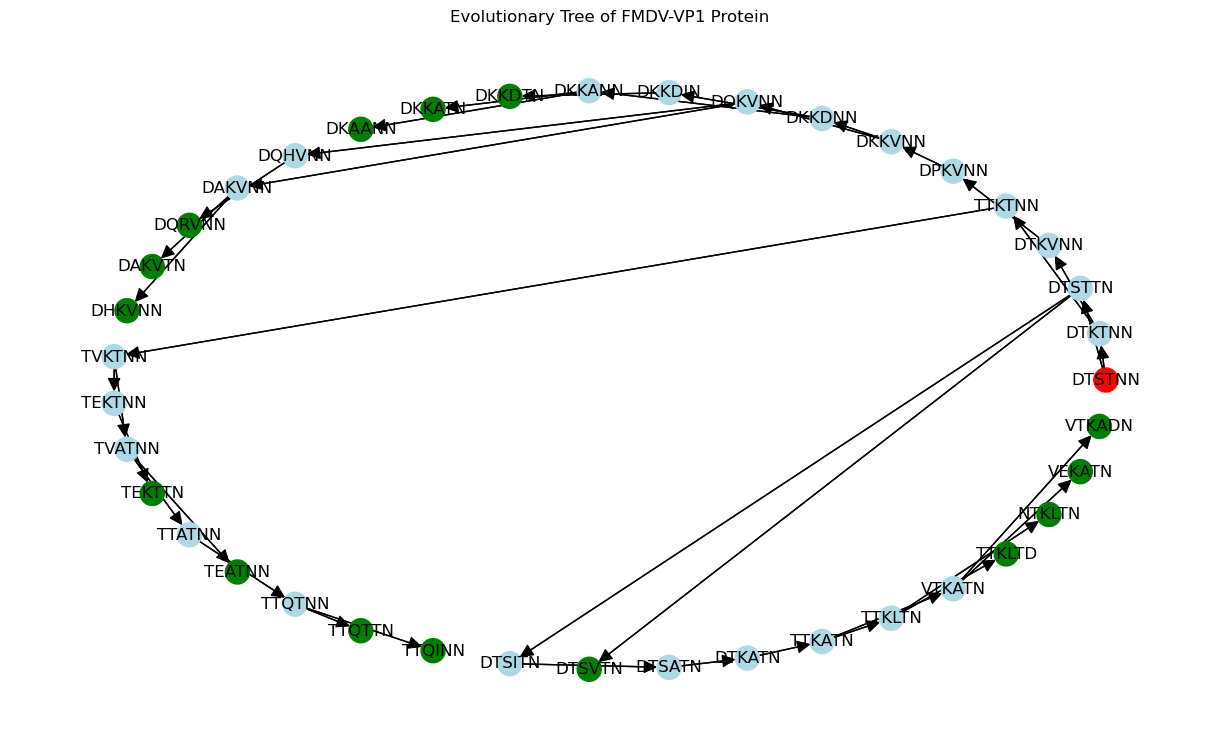

In [13]:
evolution.visualise_graph() 

In [14]:
paths = evolution.get_paths() # paths to leaf nodes only
num_of_paths = len(paths)
print(f"Number of paths generated: {num_of_paths}") # sorted by mean mutation score for path

Number of paths generated: 15


In [15]:
alignment_file_path = os.path.join("fmd_evolution/evaluation", "FMDV_VP1_1571_aln.fas") 

evaluator = Evaluation(
    tree = evolution.G,
    alignment_file_path = alignment_file_path,
    start_pos = constrained_start,
    ref_seq_id = ref_seq_id
)

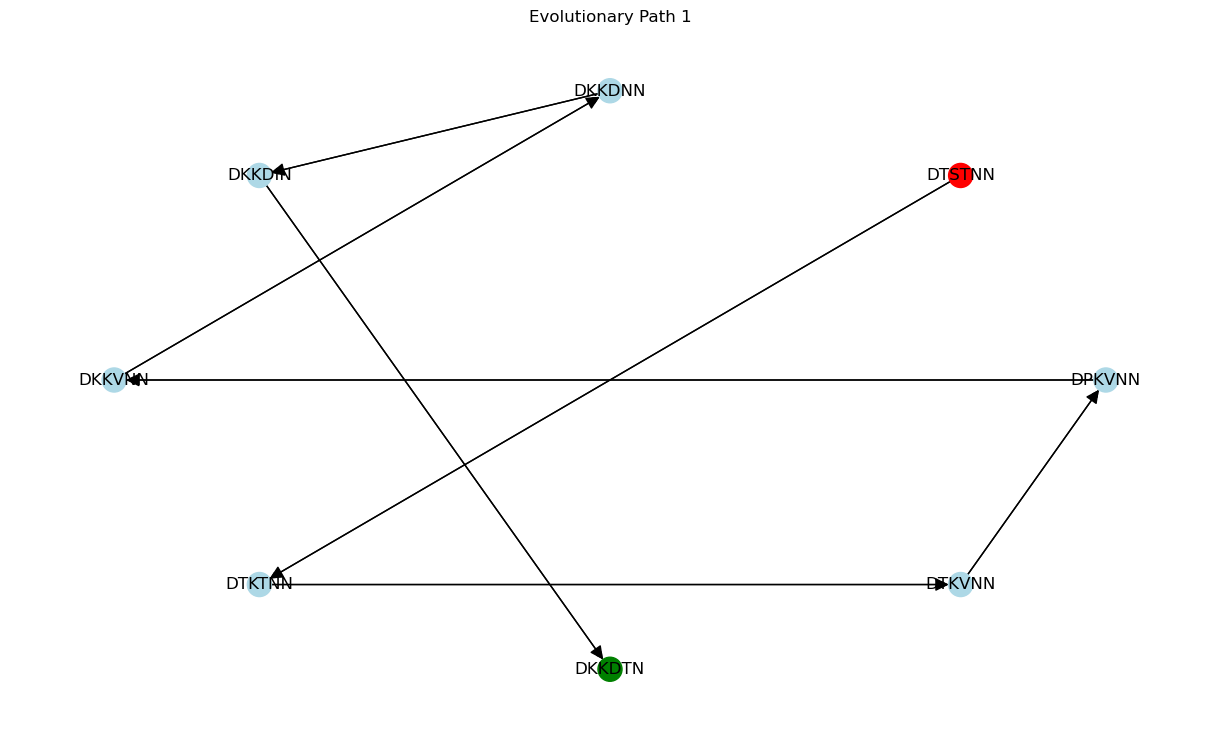

Path 1 as mutations: [None, 'S140K', 'T141V', 'T139P', 'P139K', 'V141D', 'N142I', 'I142T']


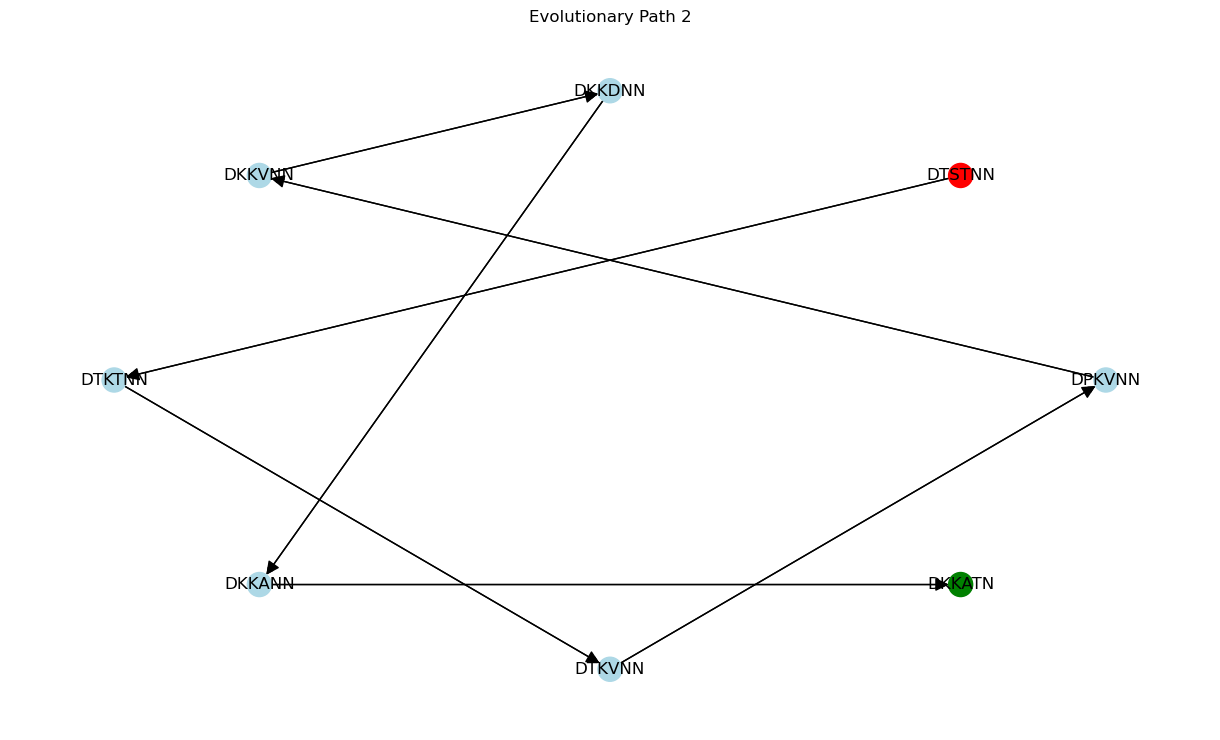

Path 2 as mutations: [None, 'S140K', 'T141V', 'T139P', 'P139K', 'V141D', 'D141A', 'N142T']


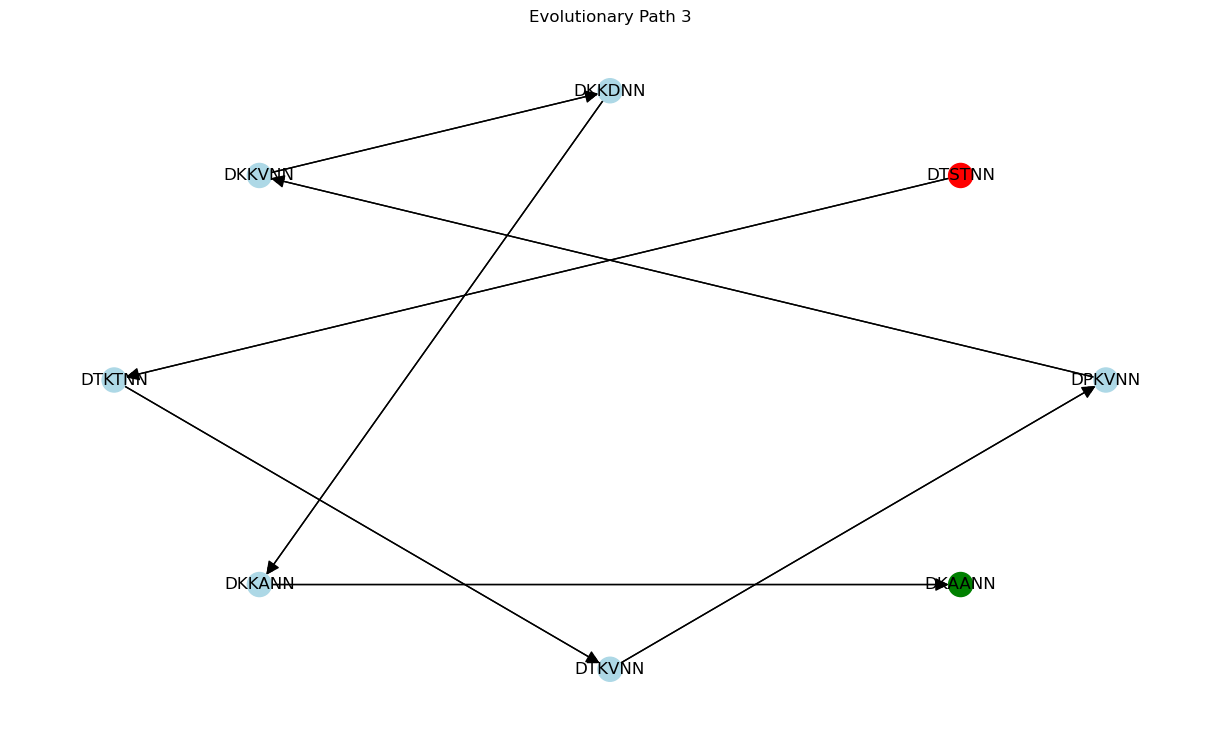

Path 3 as mutations: [None, 'S140K', 'T141V', 'T139P', 'P139K', 'V141D', 'D141A', 'K140A']


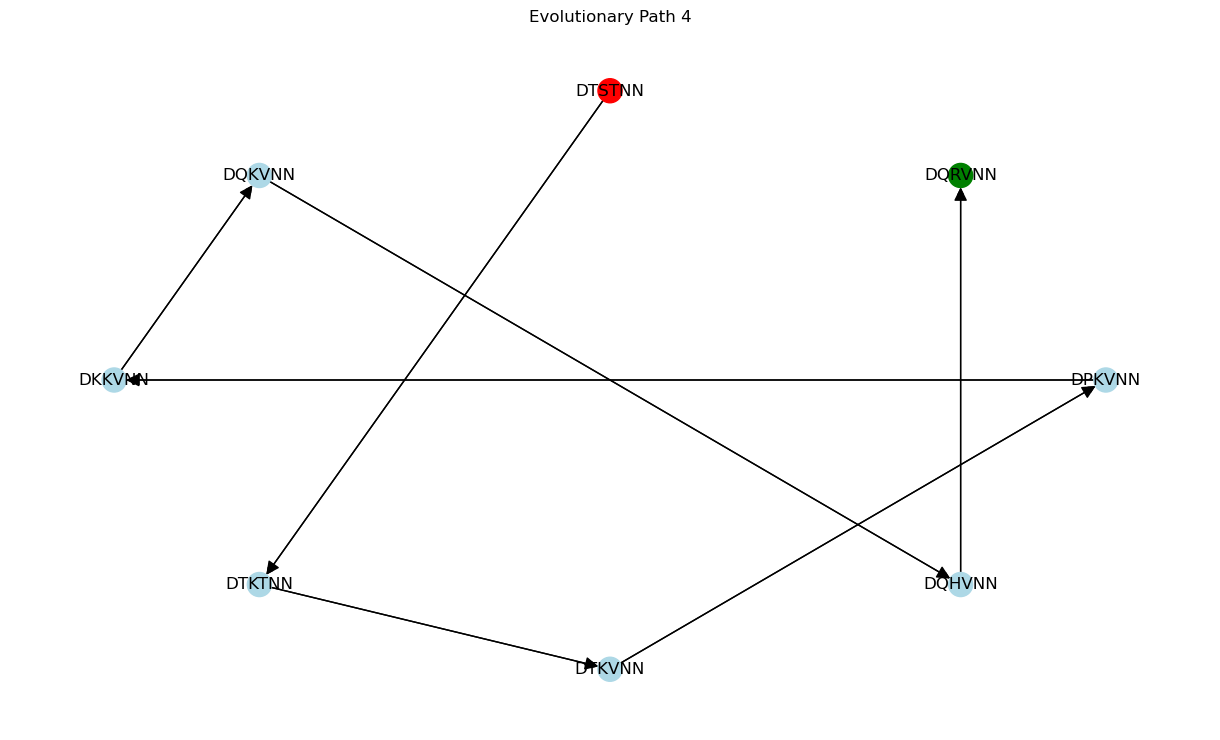

Path 4 as mutations: [None, 'S140K', 'T141V', 'T139P', 'P139K', 'K139Q', 'K140H', 'H140R']


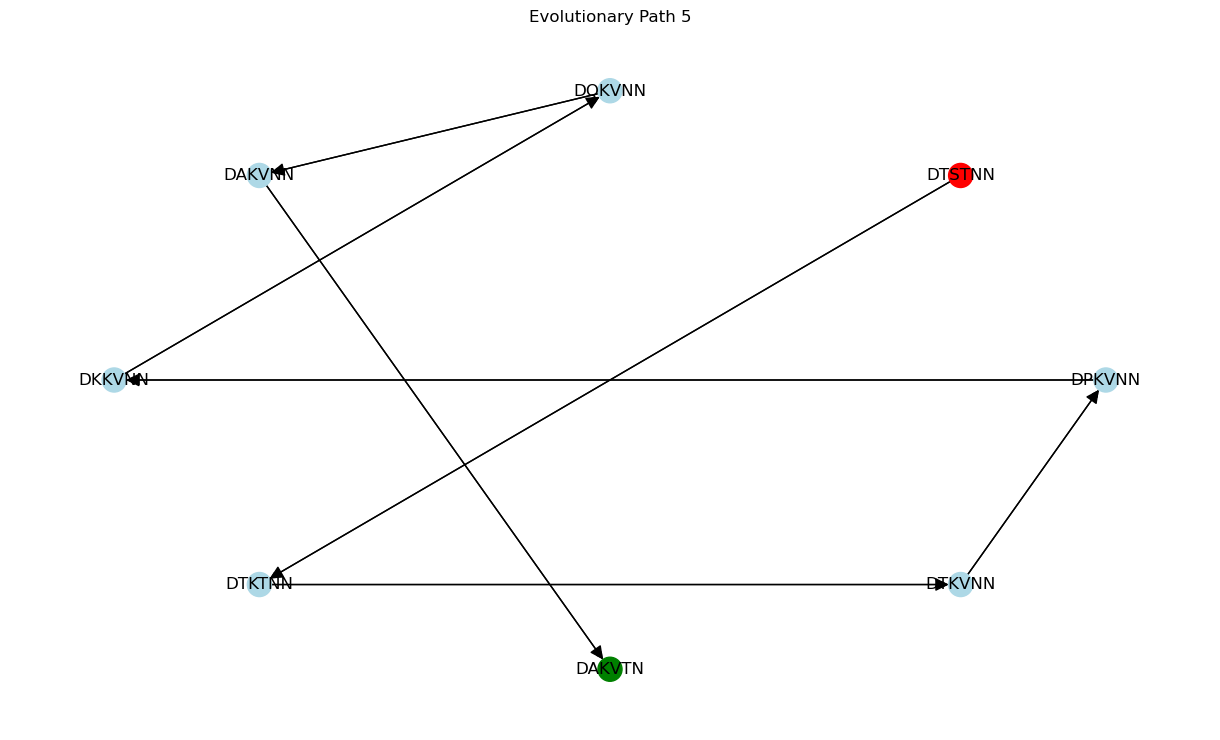

Path 5 as mutations: [None, 'S140K', 'T141V', 'T139P', 'P139K', 'K139Q', 'Q139A', 'N142T']


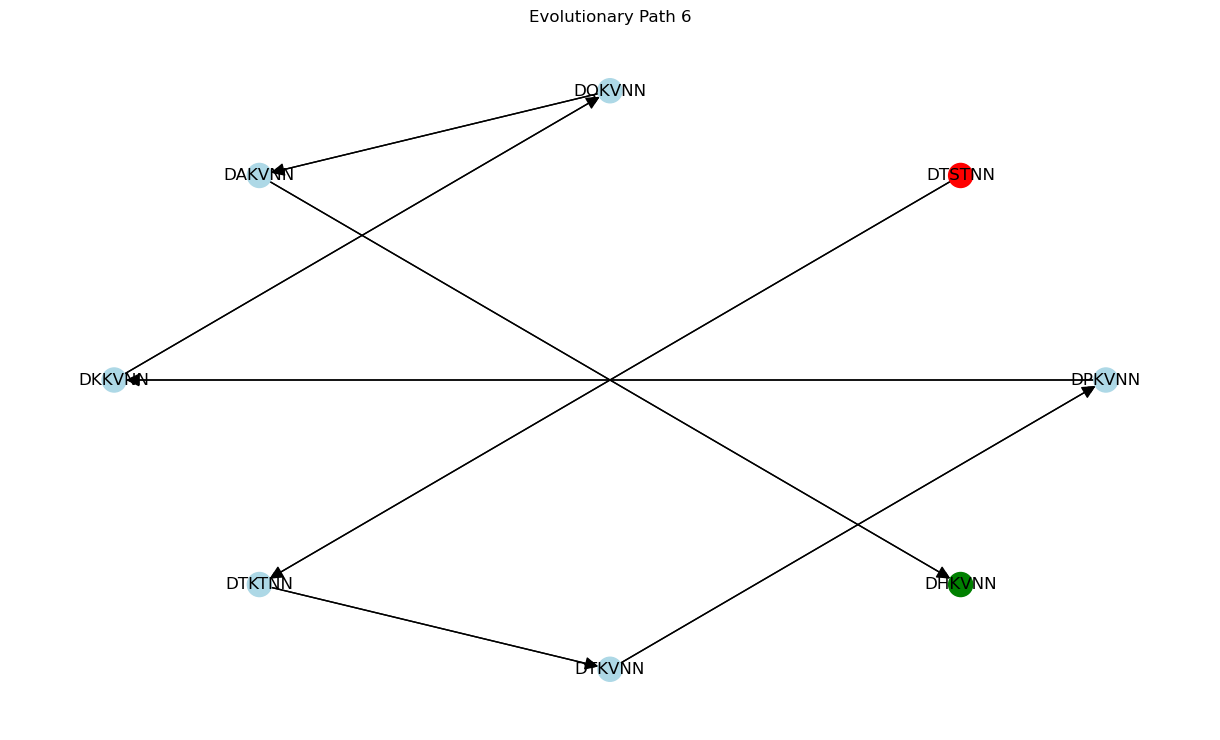

Path 6 as mutations: [None, 'S140K', 'T141V', 'T139P', 'P139K', 'K139Q', 'Q139A', 'A139H']


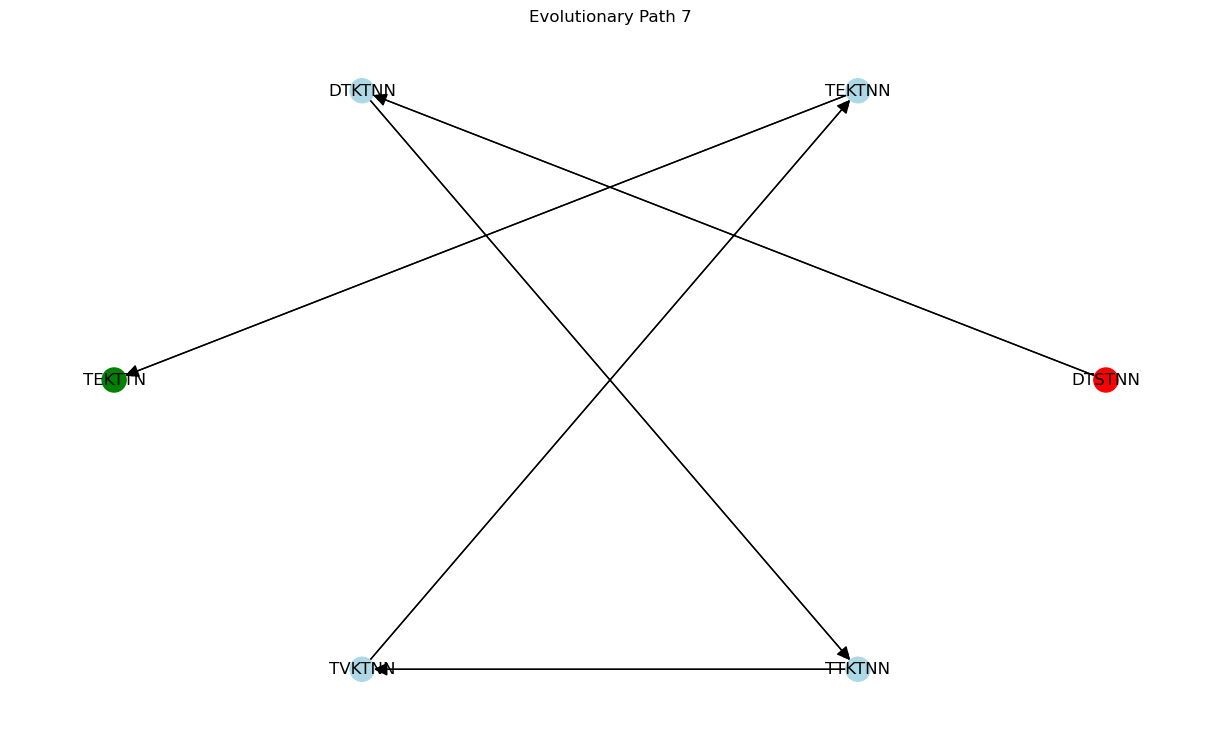

Path 7 as mutations: [None, 'S140K', 'D138T', 'T139V', 'V139E', 'N142T']


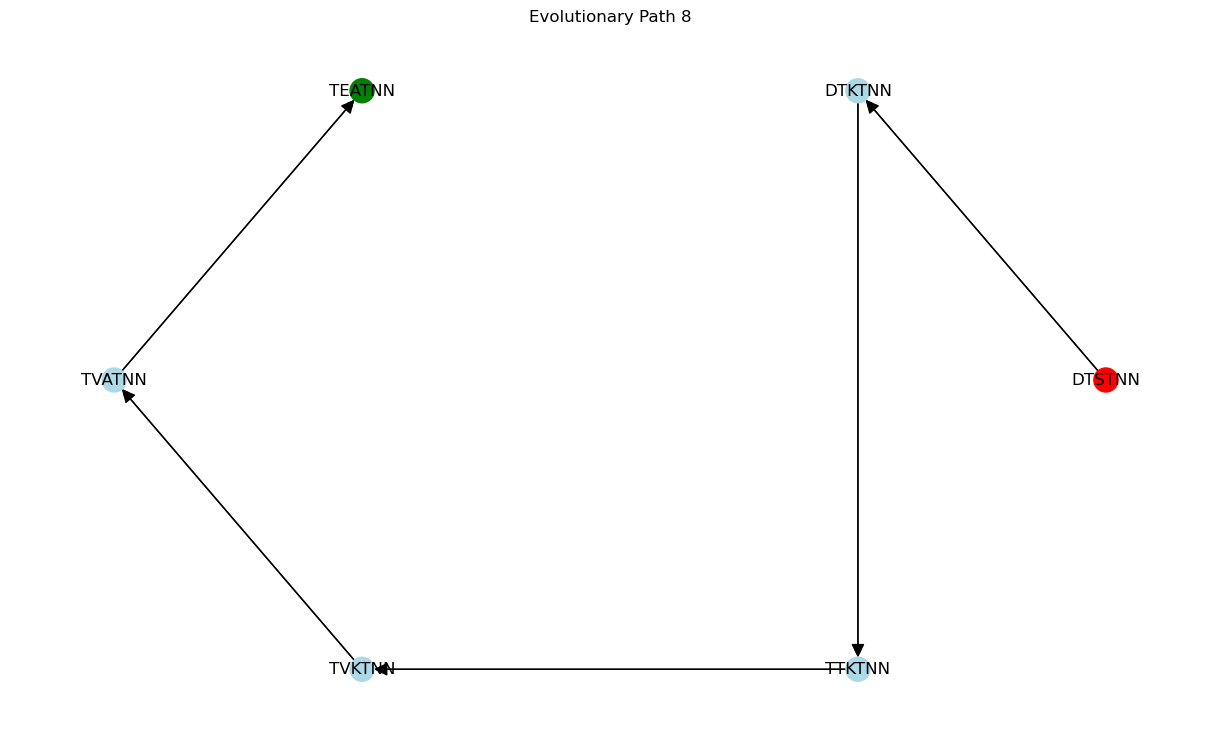

Path 8 as mutations: [None, 'S140K', 'D138T', 'T139V', 'K140A', 'V139E']


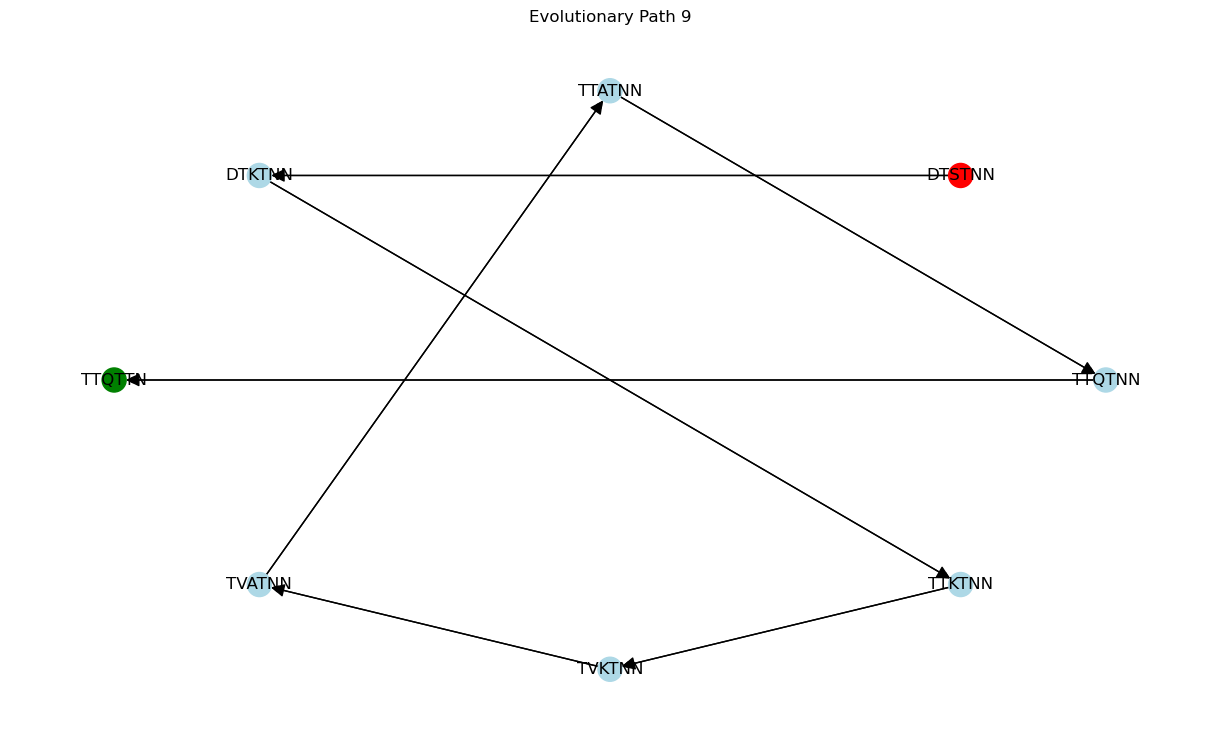

Path 9 as mutations: [None, 'S140K', 'D138T', 'T139V', 'K140A', 'V139T', 'A140Q', 'N142T']


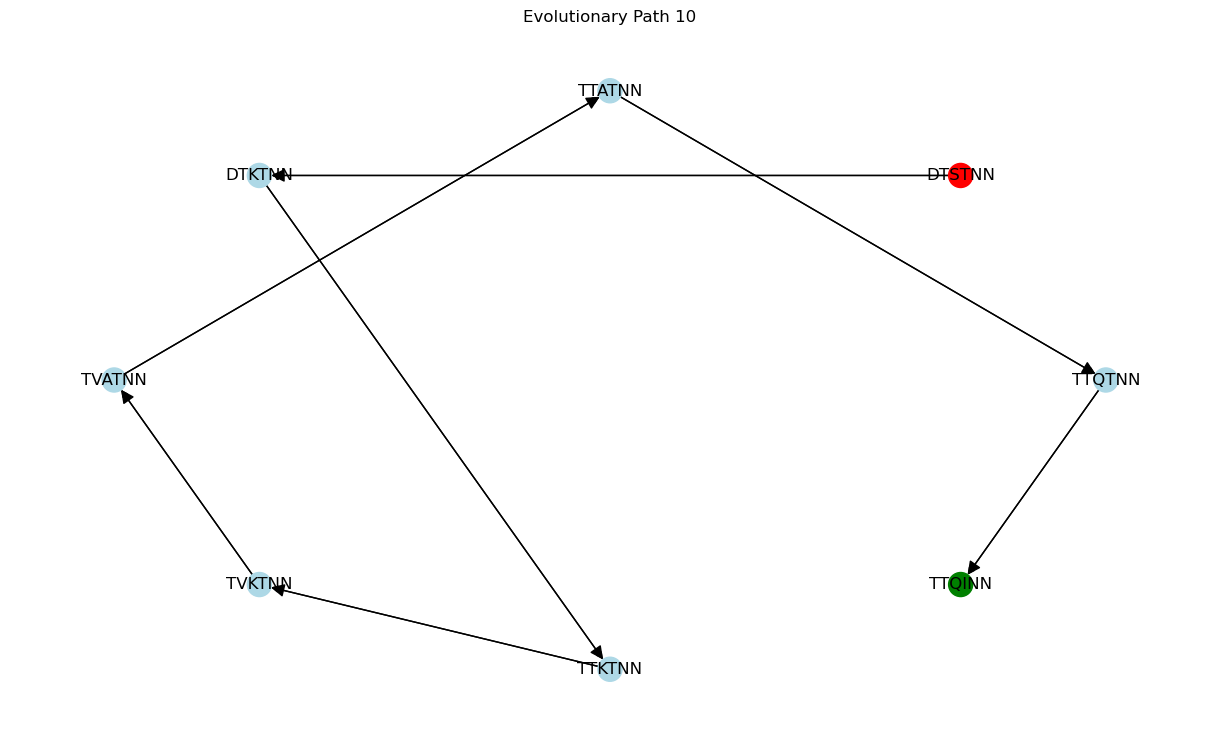

Path 10 as mutations: [None, 'S140K', 'D138T', 'T139V', 'K140A', 'V139T', 'A140Q', 'T141I']


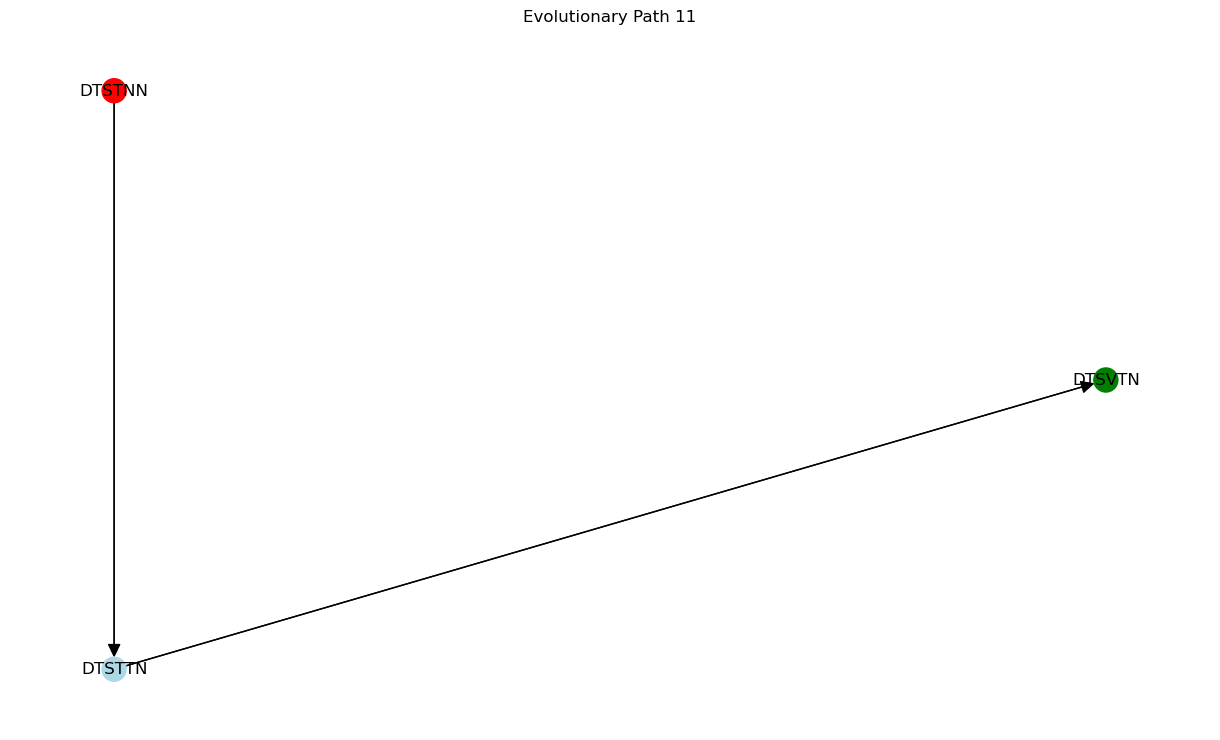

Path 11 as mutations: [None, 'N142T', 'T141V']


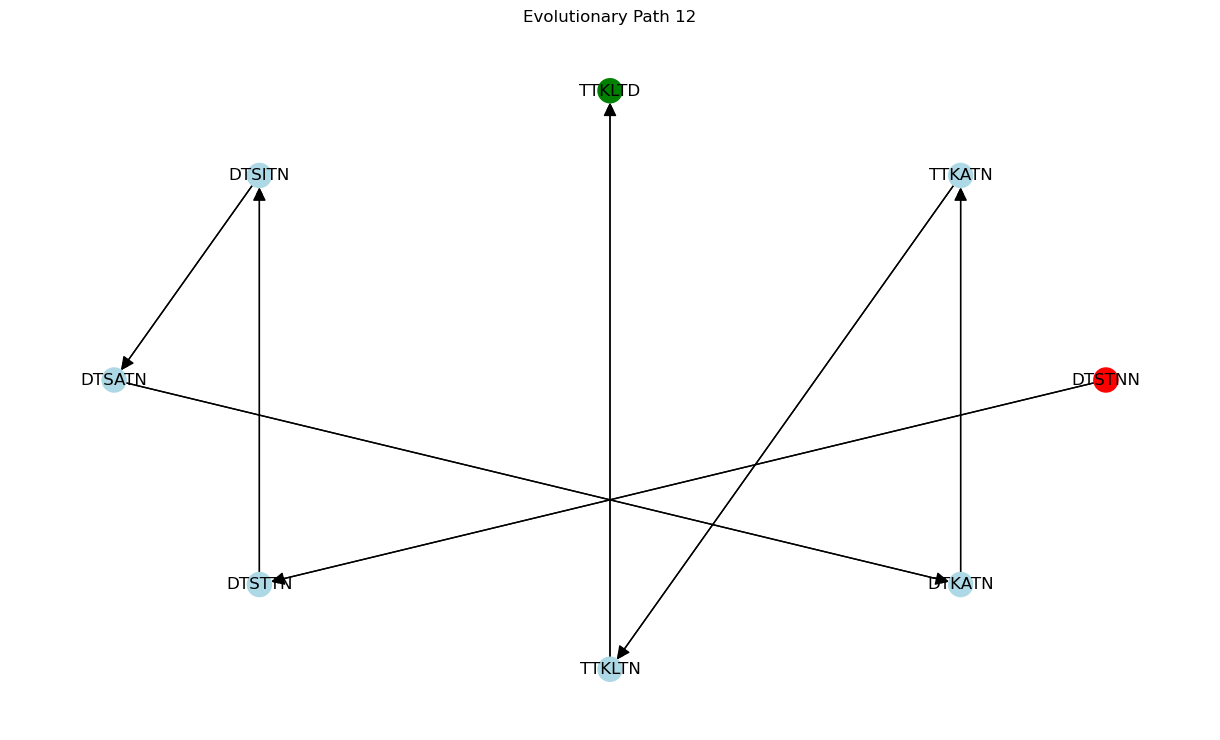

Path 12 as mutations: [None, 'N142T', 'T141I', 'I141A', 'S140K', 'D138T', 'A141L', 'N143D']


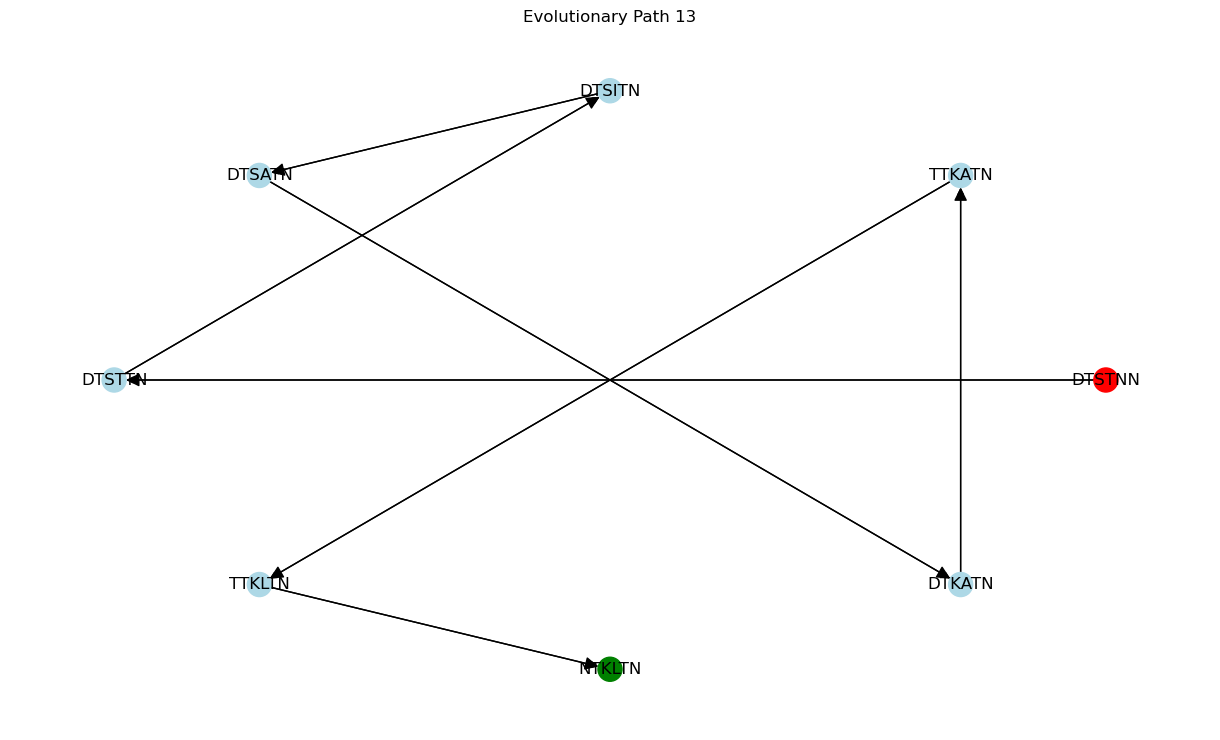

Path 13 as mutations: [None, 'N142T', 'T141I', 'I141A', 'S140K', 'D138T', 'A141L', 'T138N']


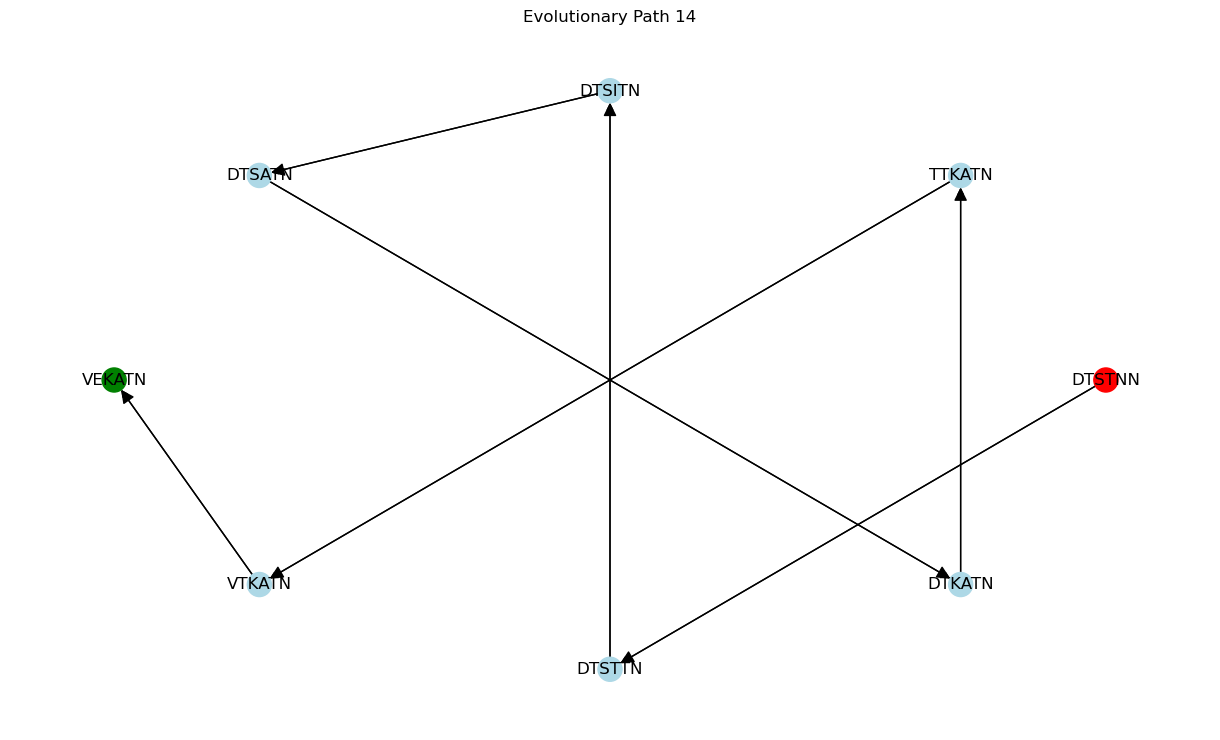

Path 14 as mutations: [None, 'N142T', 'T141I', 'I141A', 'S140K', 'D138T', 'T138V', 'T139E']


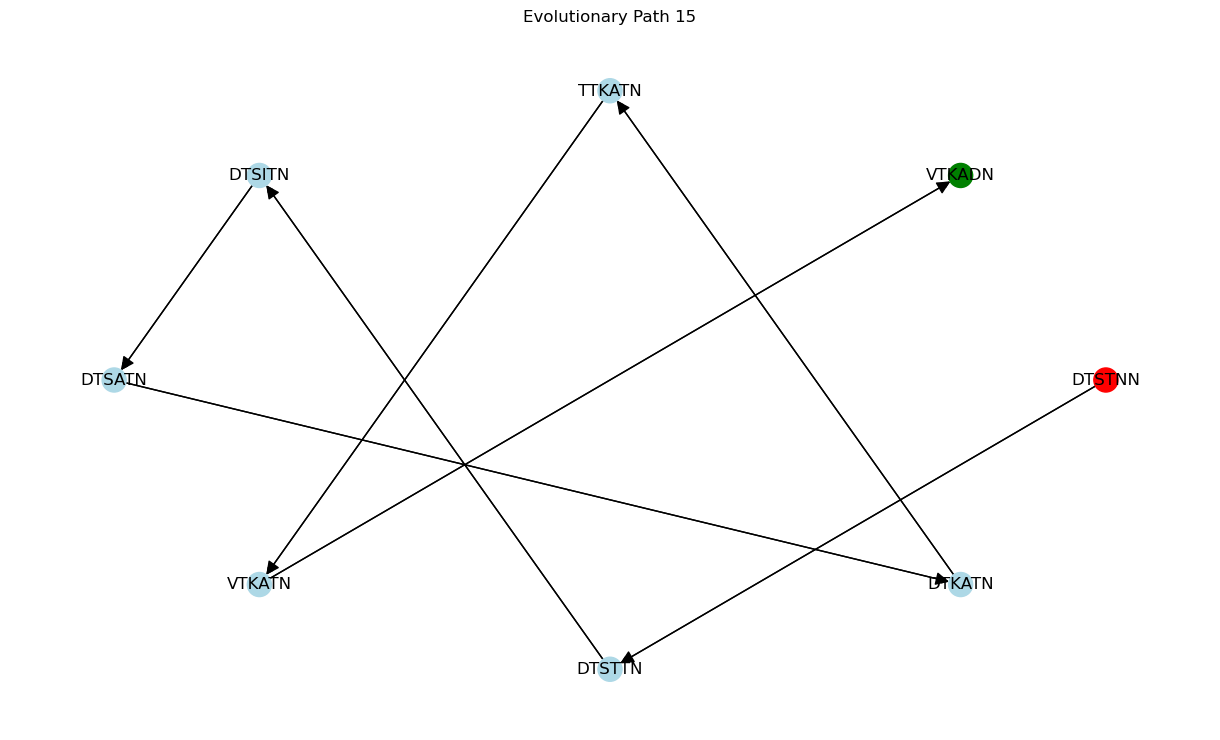

Path 15 as mutations: [None, 'N142T', 'T141I', 'I141A', 'S140K', 'D138T', 'T138V', 'T142D']


In [16]:
for i in range(num_of_paths):
    average_mutation_score,path = paths[i]
    path_name = i+1 # start from Path 1
    evolution.visualise_graph(path=path,title=f"Evolutionary Path {path_name}")
    path_as_mutations = evaluator.get_path_as_mutations(path)
    print(f"Path {path_name} as mutations: {path_as_mutations}")